# Using word2vec, and tSNE plots

In [32]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# installing spacy and its library
!pip uninstall spacy
!pip install -U pip setuptools wheel
!pip install -U spacy==3.8.0
!python -m spacy download en_core_web_sm

Found existing installation: spacy 3.8.0
Uninstalling spacy-3.8.0:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.11/dist-packages/spacy-3.8.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/spacy/*
Proceed (Y/n)? n
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
# Loading file ICD9-430_Patients_DischargeSummary csv file
from google.colab import files
import pandas as pd

d1 = files.upload()
icd9_df = pd.read_csv('ICD9-430_Patients_DischargeSummary.csv')

Saving ICD9-430_Patients_DischargeSummary.csv to ICD9-430_Patients_DischargeSummary (3).csv


In [22]:
#Building corpus

icd9_df["spacy_doc"] = icd9_df["TEXT"].apply(nlp)

corpus=[]

for doc in icd9_df["spacy_doc"]:
    print("Entities in Text:", [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents])
    print("--------------------------------------------------")
    for tokens in doc.ents:
      str_tokens=[]
      for i in range(0, len(tokens)):
        str_tokens.append(tokens[i].text)
        corpus.append(list(str_tokens))

print(corpus)

Entities in Text: [('First', 40, 45, 'ORDINAL'), ('NI', 65, 67, 'ORG'), ('326', 69, 72, 'CARDINAL'), ('NI', 85, 87, 'ORG'), ('484', 89, 92, 'CARDINAL'), ('Family Spokesperson', 212, 231, 'PERSON'), ('NI', 253, 255, 'ORG'), ('326', 257, 260, 'CARDINAL'), ('NI', 273, 275, 'ORG'), ('484', 277, 280, 'CARDINAL'), ('1', 318, 319, 'CARDINAL'), ('1', 351, 352, 'CARDINAL'), ('6961', 354, 358, 'DATE'), ('Communication', 365, 378, 'ORG'), ('54', 569, 571, 'DATE'), ('1', 620, 621, 'CARDINAL'), ('1', 647, 648, 'CARDINAL'), ('1', 677, 678, 'CARDINAL'), ('this year', 703, 712, 'DATE'), ('OMR', 718, 721, 'ORG'), ('Mandated Reporting Information: Agency', 862, 900, 'ORG'), ('POE', 962, 965, 'ORG'), ('this 55 y.o', 990, 1001, 'DATE'), ('Caucasian', 1015, 1024, 'NORP'), ('54', 1056, 1058, 'DATE'), ('2110-12-25', 1068, 1078, 'DATE'), ('PMH', 1127, 1130, 'ORG'), ('COPD', 1182, 1186, 'ORG'), ('SW', 1292, 1294, 'ORG'), ('MICU', 1357, 1361, 'ORG'), ('Spoke', 1364, 1369, 'ORG'), ('38\n years', 1469, 1478, 'DAT

In [27]:
#Using Word2Vec model

from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)


In [28]:
model1.wv['Transplant']

array([-0.00177429,  0.00646801, -0.00930912, -0.0091529 , -0.00526788,
        0.00089078, -0.0071218 , -0.00938949, -0.00896159, -0.0005919 ,
        0.00740163, -0.00843454, -0.00534606,  0.00149002,  0.00335069,
       -0.0084603 ,  0.00790637, -0.00827164,  0.00472652,  0.00935142,
        0.00565052,  0.00619105,  0.00827374,  0.003543  , -0.00719225,
        0.00580892, -0.008393  , -0.00576901,  0.00586658, -0.00793095,
       -0.00579582, -0.00358992,  0.00339922,  0.00515153,  0.0020791 ,
        0.00519451, -0.00258684,  0.00435528, -0.00709891, -0.00169706,
       -0.00776851,  0.00012196,  0.00465155,  0.00480442, -0.00461916,
        0.00168043,  0.00780051, -0.00562464, -0.00375729, -0.00060982,
       -0.00472731,  0.00865447,  0.00753433,  0.00924409,  0.00935557,
       -0.00844734, -0.00042864, -0.00766629, -0.00488665, -0.00886366,
        0.00349193,  0.00010107, -0.00683941,  0.00798866,  0.00093067,
        0.00034728, -0.00358103, -0.0033318 , -0.00266279,  0.00

In [29]:
model1.wv.similar_by_word('Transplant') #please read the below note for explaination of following output

[('Chaplain', 0.1971709281206131),
 ('187', 0.19601339101791382),
 ('61', 0.14694121479988098),
 ('last', 0.14547085762023926),
 ('to', 0.14525264501571655),
 ('Liver', 0.13825903832912445),
 ('PCP', 0.13740909099578857),
 ('2130', 0.12938404083251953),
 ('648', 0.12825751304626465),
 ('Contact', 0.12277352064847946)]

In [30]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


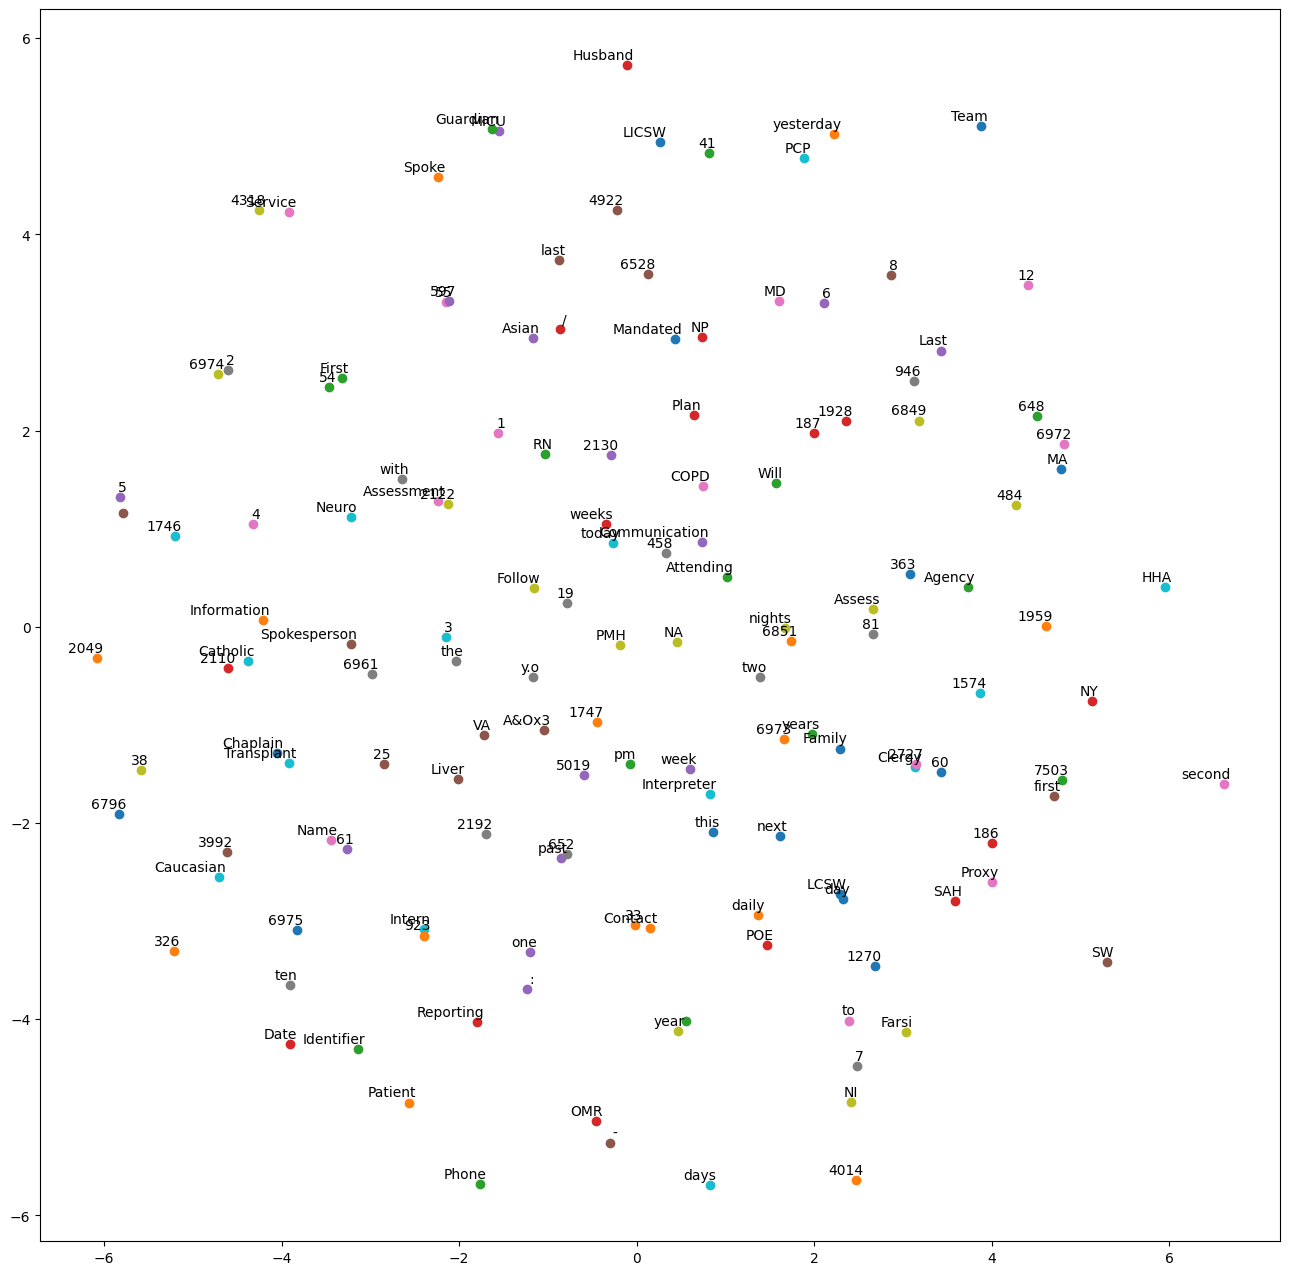

In [33]:
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

In [34]:
# load pre-trained word2vec embeddings
#Using pretrained model glove-wiki-gigaword-50
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use



[==================================================] 100.0% 66.0/66.0MB downloaded


In [35]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

Family
Patient

   
Assessment
NI
Clergy
Mandated
Contact
First
Reporting
Communication
SW
2192
NA
Information
Identifier
Husband
Spokesperson
4922
MD
Transplant
LICSW
Will
Plan
PCP
Team
RN
Last
Liver
Farsi
6796
Attending

 
Intern
Spoke
OMR
MICU
6972
6961
6974
Caucasian
MA
6973
Agency
POE
VA
COPD
y.o
PMH
Neuro
6975
6851
SAH
5019
A&Ox3
2727
4318
Catholic
Chaplain
Phone
Date
Name
Follow
Guardian
NY
6528
Proxy
6849
LCSW
NP
3992
Service
HHA
7503
Asian
Assess
Interpreter


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


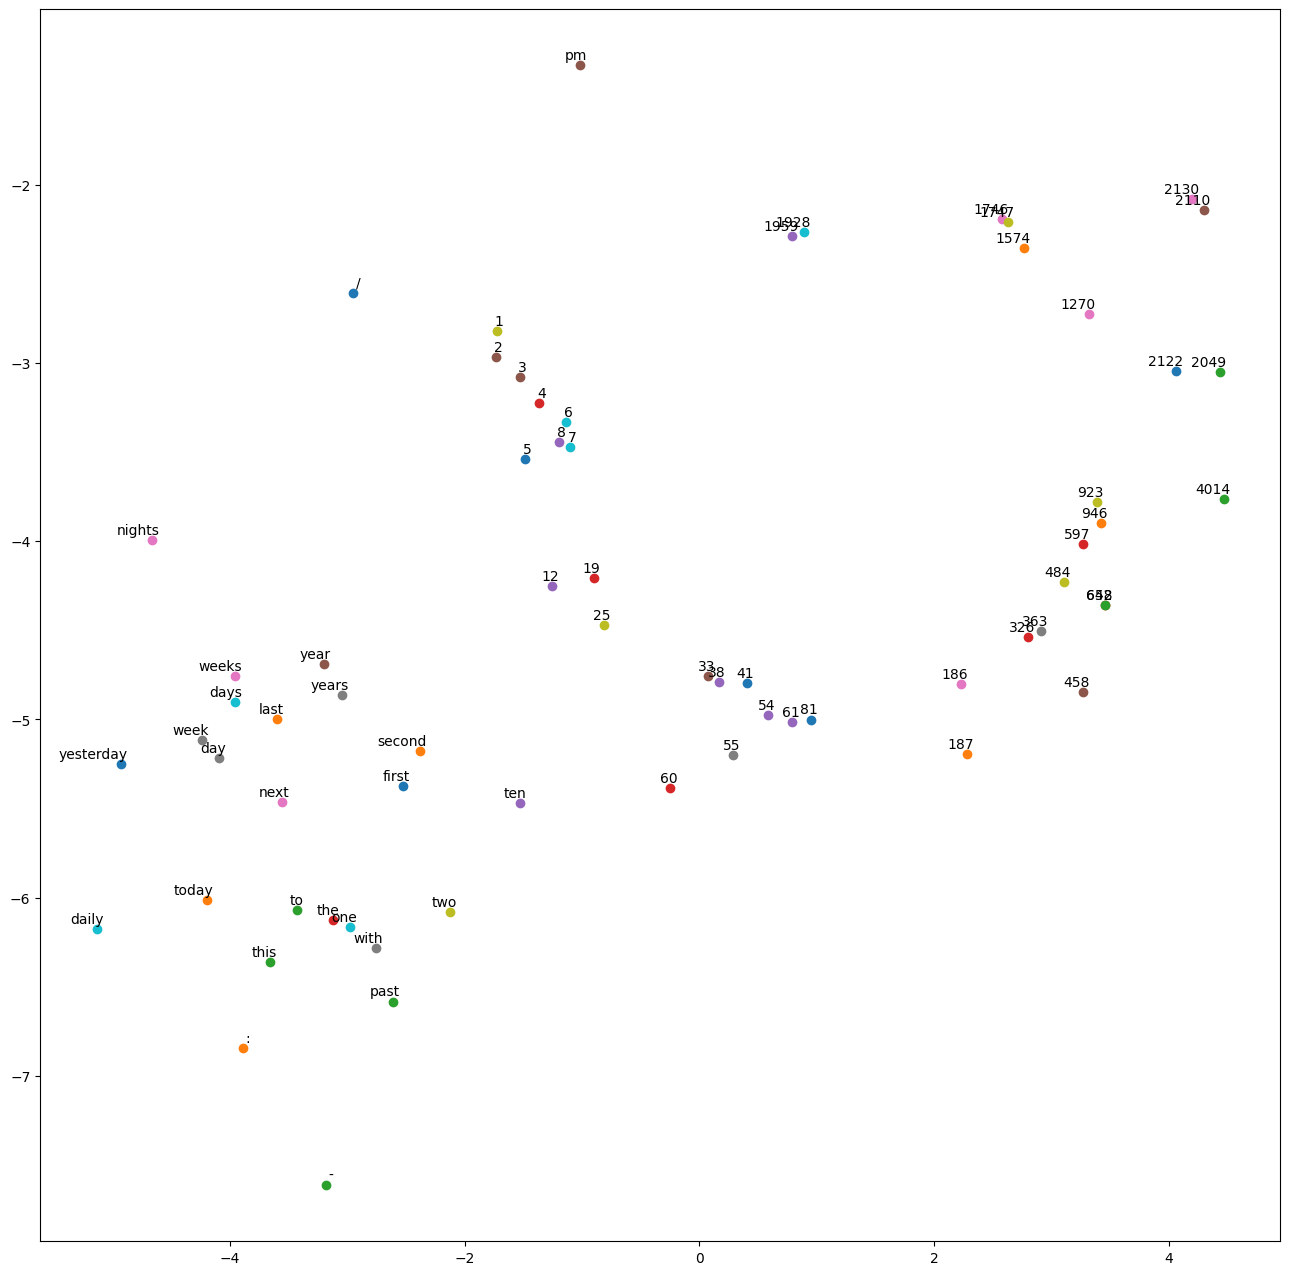

In [36]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)